In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
df = pd.read_csv('data_science_topics_survey.csv')
df.head()

,Timestamp,What's your level of interest for the following areas of Data Science? [Data Visualization],What's your level of interest for the following areas of Data Science? [Machine Learning],What's your level of interest for the following areas of Data Science? [Data Analysis / Statistics],What's your level of interest for the following areas of Data Science? [Big Data (Spark / Hadoop)],What's your level of interest for the following areas of Data Science? [Data Journalism],What's your level of interest for the following areas of Data Science? [Deep Learning]
0,2017/10/17 1:11:52 PM MDT,Very interested,Very interested,Somewhat interested,Not interested,Somewhat interested,Somewhat interested
1,2017/10/17 2:26:07 PM MDT,Very interested,Very interested,Very interested,Somewhat interested,Not interested,Very interested
2,2017/10/17 2:37:08 PM MDT,Not interested,Very interested,Somewhat interested,Very interested,Not interested,Very interested
3,2017/10/17 2:39:26 PM MDT,Very interested,Very interested,Very interested,Very interested,Somewhat interested,Very interested
4,2017/10/17 2:43:59 PM MDT,Somewhat interested,Very interested,Very interested,Very interested,Not interested,Somewhat interested


In [3]:
# renaming Column
df.rename(columns = {"What's your level of interest for the following areas of Data Science? [Data Visualization]": 'Data Visualization',
                     "What's your level of interest for the following areas of Data Science? [Machine Learning]":'Machine Learning',
                     "What's your level of interest for the following areas of Data Science? [Data Analysis / Statistics]":'Data Analysis / Statistics',
                     "What's your level of interest for the following areas of Data Science? [Big Data (Spark / Hadoop)]":'Big Data (Spark / Hadoop',
                     "What's your level of interest for the following areas of Data Science? [Data Journalism]":'Data Journalism',
                     "What's your level of interest for the following areas of Data Science? [Deep Learning]":'Deep Learning'}, inplace=True)

In [4]:
df.drop(['Timestamp'],axis=1, inplace=True)
df

,Data Visualization,Machine Learning,Data Analysis / Statistics,Big Data (Spark / Hadoop,Data Journalism,Deep Learning
0,Very interested,Very interested,Somewhat interested,Not interested,Somewhat interested,Somewhat interested
1,Very interested,Very interested,Very interested,Somewhat interested,Not interested,Very interested
2,Not interested,Very interested,Somewhat interested,Very interested,Not interested,Very interested
3,Very interested,Very interested,Very interested,Very interested,Somewhat interested,Very interested
4,Somewhat interested,Very interested,Very interested,Very interested,Not interested,Somewhat interested
...,...,...,...,...,...,...
2228,Very interested,Very interested,Very interested,Very interested,Very interested,Very interested
2229,Very interested,Very interested,Very interested,Very interested,Very interested,Very interested
2230,Very interested,Very interested,Very interested,Very interested,Not interested,Somewhat interested
2231,Very interested,Somewhat interested,Somewhat interested,Somewhat interested,Somewhat interested,Very interested


In [101]:
df1 = df # backup

In [102]:
df1 = df1.apply(pd.value_counts)
df1

,Data Visualization,Machine Learning,Data Analysis / Statistics,Big Data (Spark / Hadoop,Data Journalism,Deep Learning
Not interested,102,74,60,127,610,136
Somewhat interested,734,477,444,729,1081,770
Very interested,1340,1629,1688,1332,429,1263


In [103]:
df1.sort_index(inplace=True, ascending=False)

In [104]:
df1

,Data Visualization,Machine Learning,Data Analysis / Statistics,Big Data (Spark / Hadoop,Data Journalism,Deep Learning
Very interested,1340,1629,1688,1332,429,1263
Somewhat interested,734,477,444,729,1081,770
Not interested,102,74,60,127,610,136


In [105]:
df1.dtypes

Data Visualization            int64
Machine Learning              int64
Data Analysis / Statistics    int64
Big Data (Spark / Hadoop      int64
Data Journalism               int64
Deep Learning                 int64
dtype: object

In [106]:
df1 = df1.transpose()

In [107]:
df1

,Very interested,Somewhat interested,Not interested
Data Visualization,1340,734,102
Machine Learning,1629,477,74
Data Analysis / Statistics,1688,444,60
Big Data (Spark / Hadoop,1332,729,127
Data Journalism,429,1081,610
Deep Learning,1263,770,136


In [108]:
df1 = (100. * df1 / 2233).round(2) #(df1/2233).style.format("{:.2%}")
df1

,Very interested,Somewhat interested,Not interested
Data Visualization,60.01,32.87,4.57
Machine Learning,72.95,21.36,3.31
Data Analysis / Statistics,75.59,19.88,2.69
Big Data (Spark / Hadoop,59.65,32.65,5.69
Data Journalism,19.21,48.41,27.32
Deep Learning,56.56,34.48,6.09


In [118]:
#df1.sort_index(ascending=True, inplace=True)

df1.sort_values(by=['Very interested','Somewhat interested','Not interested'],ascending=False,inplace=True)

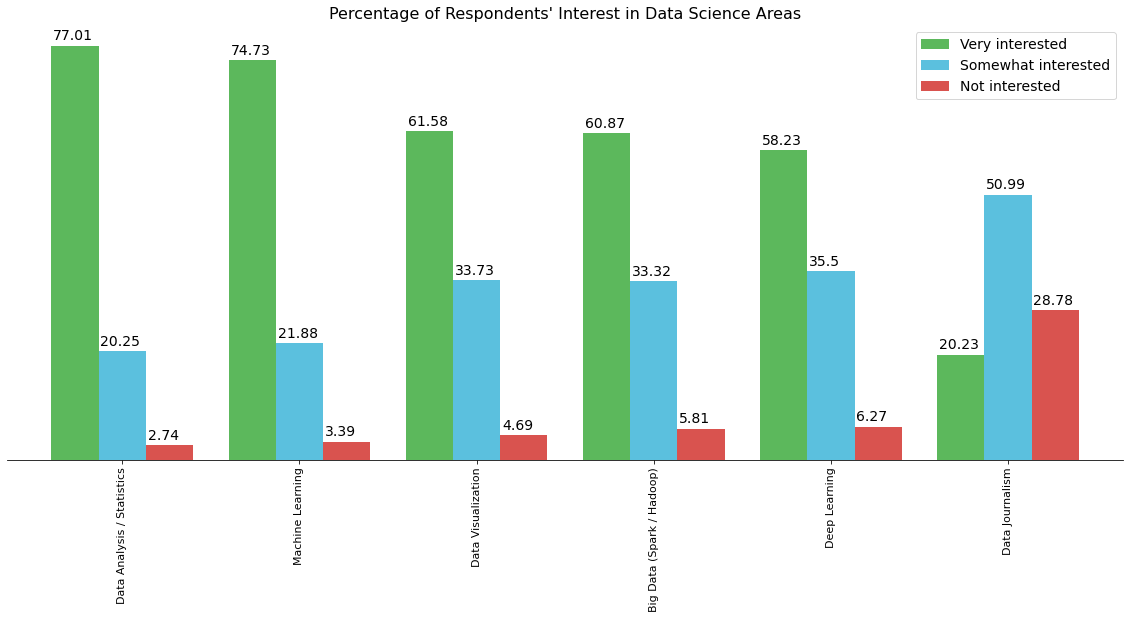

In [132]:
ax = df1.plot(kind='bar',figsize = (20, 8), 
          width = 0.8, 
          color = ('#5cb85c', '#5bc0de', '#d9534f'), 
          linewidth=0, 
          edgecolor='white'
        )
title = "Percentage of Respondents' Interest in Data Science Areas"
ax.set_title(title, fontsize=16)


# Plotting text in x location & Giving Legend Size
ax.set_xticklabels(['Data Analysis / Statistics', 'Machine Learning', 'Data Visualization', 'Big Data (Spark / Hadoop)', 'Deep Learning', 'Data Journalism'], fontsize=11)
plt.legend(fontsize = 14)

# to Remove Boders from right & left, from fig
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Display the percentages above the bars
totals = []

for i in ax.patches:
    totals.append(i.get_height())

tem = []
for i in range(0, 6):
    tem.append(totals[i] + totals[i + 6] + totals[i + 12])

j = 0
for i in ax.patches:
    if j == 6:
        j = 0
    t = round((i.get_height() / tem[j])*100, 2)
    ax.text(i.get_x() + 0.01, i.get_height() + 1, str(t), fontsize = 14, color='black')# setting text width height.
    j += 1

plt.show()